## Convolutional Layaer

Convolutional layer scratch development

In [10]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

In [2]:
dataset = torchvision.datasets.MNIST(root='./data/mnist_data', train=True, download=True)
im, label =dataset[0]
im = transforms.ToTensor()(im)[0,:,:]

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4643004.18it/s]


Extracting ./data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 141667.24it/s]


Extracting ./data/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1327693.95it/s]


Extracting ./data/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2989256.04it/s]

Extracting ./data/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist_data/MNIST/raw



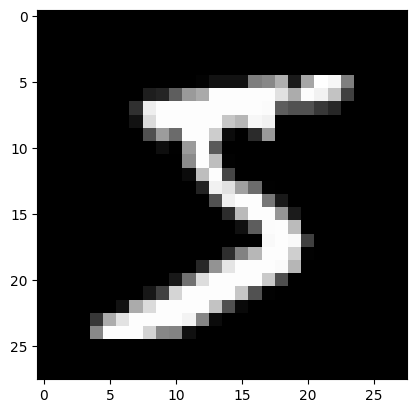

In [4]:
plt.imshow(im, cmap='gray')

In [45]:
import pandas as pd
df = pd.DataFrame(im)
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys_r')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.07,0.07,0.49,0.53,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,0.37,0.60,0.67,0.99,0.99,0.99,0.99,0.99,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,0.99,0.99,0.99,0.99,0.78,0.71,0.97,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,0.42,0.99,0.99,0.80,0.04,0.00,0.17,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
top_edge_filter = torch.tensor([[-1.,-1.,-1.],
                                 [0.,0.,0.],
                                 [1.,1.,1.]])
top_edge_filter

tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])

In [57]:
def apply_filter(im, filter):
    im_h,im_w = im.shape
    f_h,f_w = filter.shape
    
    height = im_h - f_h + 1
    width = im_w - f_w + 1
    
    output_data= []
    
    for h in range(height):
        row = []
        for w in range(width):
            row.append((im[h:h+f_h,w:w+f_w] * top_edge_filter).sum().item())
        output_data.append(row)
    
    return output_data

In [58]:
filtered_im = apply_filter(im, top_edge_filter)

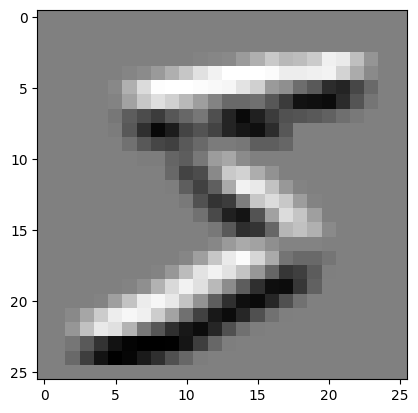

In [60]:
plt.imshow(filtered_im, cmap='gray')

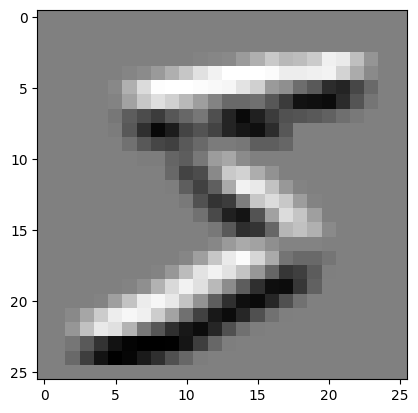

In [62]:
left_edge_filter = torch.tensor([[-1.,0.,1.],
                                 [-1.,0.,1.],
                                 [-1.,0.,1.]])
filtered_im = apply_filter(im, left_edge_filter)
plt.imshow(filtered_im, cmap='gray')